# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente. Como esta evolución de precios es aleatoria, utilizaremos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [ ]:
# Instalación del paquete

# conda install pandas-datareader
# pip install pandas-datareader

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
 def getClose(names, start, end) :
    return yf.download(names, start=start, end=end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Frequency'>

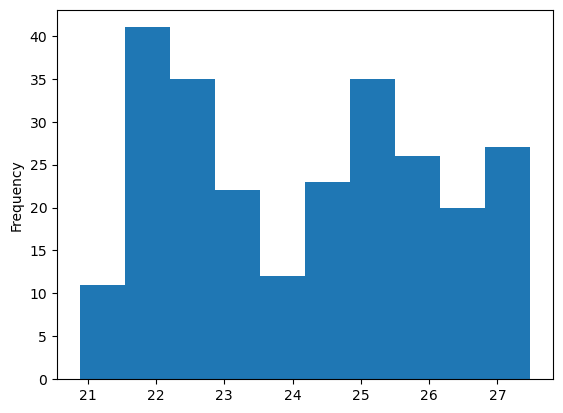

In [4]:
data_aapl = getClose("AAPL", "2016-01-01", "2016-12-31")
data_aapl.plot.hist()

In [5]:
data_aapl

Date
2016-01-04    24.074739
2016-01-05    23.471445
2016-01-06    23.012112
2016-01-07    22.040901
2016-01-08    22.157440
                ...    
2016-12-23    27.219759
2016-12-27    27.392628
2016-12-28    27.275827
2016-12-29    27.268816
2016-12-30    27.056242
Name: Adj Close, Length: 252, dtype: float64

In [6]:
data_aapl[-1]

27.056241989135742

In [7]:
data_aapl[0]

24.074739456176758

## 2. Simulación de rendimientos diarios

Recordemos que los precios diarios de cierre ajustados no son un proceso estocástico estacionario, pero los rendimientos diarios si lo son. Por tanto calculamos los rendimientos a partir de los precios de cierre, obtenemos sus propiedades estadísticas muestrales y proyectamos los rendimientos. Luego, obtenemos la proyección de los precios.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

Además, supusimos que los rendimientos diarios eran una variable aleatoria con distribución normal (que se caracteriza con su media y varianza). Por tanto obtenemos la media y desviación estandar muestrales. Hagamos una función que retorne lo anterior.

<AxesSubplot:ylabel='Frequency'>

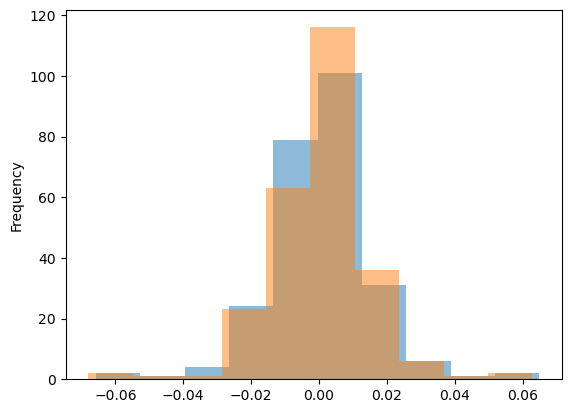

In [8]:
R = (data_aapl - data_aapl.shift())/ data_aapl.shift() # Tasa de cambio
r = np.log(data_aapl/data_aapl.shift()) 

R.plot.hist(alpha=0.5)
r.plot.hist(alpha=0.5)

In [9]:
R.describe()

count    251.000000
mean       0.000574
std        0.014731
min       -0.065707
25%       -0.005780
50%        0.000891
75%        0.007734
max        0.064963
Name: Adj Close, dtype: float64

In [10]:
r.describe()

count    251.000000
mean       0.000465
std        0.014753
min       -0.067965
25%       -0.005797
50%        0.000891
75%        0.007704
max        0.062940
Name: Adj Close, dtype: float64

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

### Una distribución NORMAL se caracteriza por una MEDIA y una DESV. ESTANDAR.


In [11]:
R_aapl_mean = R.mean() 
R_aapl_std = R.std()

R

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042204
2016-01-08    0.005287
                ...   
2016-12-23    0.001978
2016-12-27    0.006351
2016-12-28   -0.004264
2016-12-29   -0.000257
2016-12-30   -0.007795
Name: Adj Close, Length: 252, dtype: float64

In [12]:
np.random.seed(2)
R_aapl_sim = np.random.normal(R_aapl_mean, R_aapl_std, (5, 10)) # para 5 días (10 SIMULACIONES)
R_aapl_sim

array([[-0.00556576, -0.00025533, -0.03089498,  0.02473655, -0.02584574,
        -0.01182632,  0.00798155, -0.01777092, -0.01501126, -0.01281714],
       [ 0.00869708,  0.03434031,  0.00118547, -0.01589473,  0.00851447,
        -0.00820854,  0.00029173,  0.01788262, -0.01044342,  0.0007065 ],
       [-0.01236195, -0.0017309 ,  0.00435311, -0.01399226, -0.00441767,
        -0.0029057 , -0.00881982, -0.0169213 , -0.02036255, -0.00168761],
       [-0.00338996,  0.03344405, -0.03529327,  0.00223413,  0.00603061,
         0.02060246,  0.00796646, -0.01186265,  0.00057369,  0.008563  ],
       [-0.00404478,  0.0119314 , -0.02694549,  0.02607581,  0.02219407,
        -0.00437135,  0.00957927,  0.00128021, -0.01164053,  0.00186562]])

<AxesSubplot:ylabel='Frequency'>

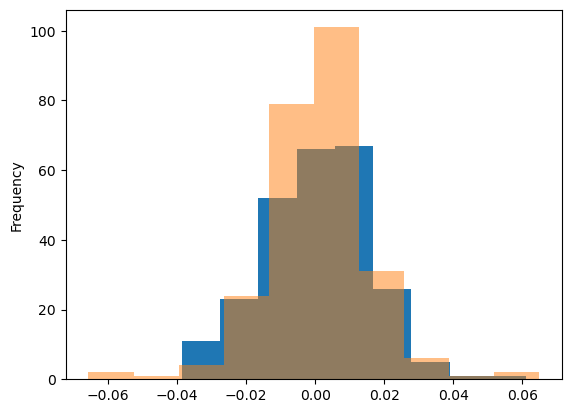

In [13]:
np.random.seed(2)
R_aapl_sim = np.random.normal(R_aapl_mean, R_aapl_std, size=252) # para 5 días, 10 simulaciones
plt.figure()
plt.hist(R_aapl_sim, bins=9)
R.plot.hist(alpha=0.5, bins=10)

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos desde 2016, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2021 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [14]:
# toma la media y la desv. para dibujar una campana y ya que la tiene, toma las muestras y te regresa las muestras que te pide

def sim_r(media, std, inicio, dias, N) :
    # media
    # desviación est.
    # desde que fecha voy a simular
    # muestras por N
    
    r = np.random.normal(media, std, inicio, size = (días, N))
    fechas = pd.date_range(inicio, periods=dias)
    # para sacar datas de la distr. normal
    

In [15]:
# que empiece tal día y termine tal día
pd.date_range(start="2023-01-01", periods = 100)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [16]:
def sim_r(media, std, inicio, dias, N) :
    r = np.random.normal(media, std, size = (dias , N))
    fechas = pd.date_range(inicio, periods = dias)
    return pd.DataFrame(index = fechas, data = r)
r_simulados = sim_r(R_aapl_mean, R_aapl_std, "2016-12-31", 31, 1000) #1000 simulaciones en 31 días

In [17]:
(r_simulados + 1).cumprod()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2016-12-31,1.001417,1.002917,0.965596,1.001436,1.006120,0.998578,1.005522,1.028627,1.001831,1.010375,...,1.008572,1.009192,1.006544,0.980124,0.988180,1.028056,1.003981,0.994324,1.004299,0.992049
2017-01-01,1.004432,0.992226,0.956584,0.978958,1.032657,1.009732,1.015350,1.042391,1.000583,0.994886,...,1.046585,1.024921,1.025225,0.954733,0.979911,1.006751,1.015133,1.020896,0.994593,0.980922
2017-01-02,1.025002,0.975238,0.965709,0.971322,1.044270,1.002298,0.991700,1.045426,0.978277,1.001735,...,1.057733,1.024747,1.022840,0.951172,1.016719,0.989630,1.019389,1.017027,0.998975,1.007596
2017-01-03,1.012089,0.928711,0.944413,0.972688,1.029337,0.998841,0.977260,1.067050,0.958279,0.997477,...,1.088390,0.998069,1.040921,0.937795,1.019012,1.003251,1.003939,1.029633,1.007759,0.999605
2017-01-04,1.040854,0.918138,0.962121,0.974344,1.020913,0.983570,0.963914,1.070329,0.980795,1.002334,...,1.077827,0.966002,1.039495,0.908742,1.031113,0.995464,0.993556,1.010732,0.996377,1.014179
2017-01-05,1.062082,0.927163,0.974584,0.997114,1.018891,0.979442,0.949439,1.045865,0.971943,1.012732,...,1.087377,0.969040,1.062639,0.894953,1.040107,0.991589,0.995186,0.997423,0.970742,1.014574
2017-01-06,1.081080,0.923331,0.986429,1.007190,1.007090,0.979264,0.963592,1.070675,0.979352,1.031432,...,1.071796,0.985181,1.069272,0.904171,1.047850,1.008210,0.986040,1.001023,0.946088,1.022080
2017-01-07,1.066850,0.905502,1.015146,1.017630,1.007026,0.980274,0.949543,1.066231,0.949675,1.053510,...,1.080960,0.976651,1.053082,0.931653,1.031713,0.999766,0.984631,1.014203,0.943060,1.015019
2017-01-08,1.060378,0.912678,1.008054,1.011895,0.991310,0.969580,0.947516,1.083538,0.939238,1.067760,...,1.096840,0.970370,1.034301,0.925669,1.021152,0.980245,0.987534,1.010328,0.957148,1.024359
2017-01-09,1.068071,0.885605,1.000692,0.994943,1.007405,0.970719,0.937226,1.082619,0.943217,1.055199,...,1.115697,0.948956,1.043680,0.944043,1.027092,0.991645,0.979434,1.011761,0.946157,1.060455


In [18]:
data_aapl[-1]

27.056241989135742

In [19]:
(r_simulados + 1).cumprod()*data_aapl[-1] # para sacar el precio de la acción según el último dato del precio de la acción

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2016-12-31,27.094578,27.135168,26.125398,27.095084,27.221839,27.017762,27.205642,27.830784,27.105784,27.336941,...,27.288170,27.304953,27.233296,26.518480,26.736448,27.815327,27.163956,26.902667,27.172568,26.841114
2017-01-01,27.176154,26.845913,25.881581,26.486917,27.939816,27.319554,27.471548,28.203190,27.072027,26.917868,...,28.316651,27.730503,27.738729,25.831493,26.512716,27.238907,27.465682,27.621608,26.909951,26.540070
2017-01-02,27.732697,26.386264,26.128453,26.280327,28.254021,27.118409,26.831682,28.285300,26.468504,27.103194,...,28.618293,27.725809,27.674203,25.735152,27.508589,26.775679,27.580847,27.516931,27.028510,27.261764
2017-01-03,27.383323,25.127425,25.552279,26.317294,27.849990,27.024891,26.440979,28.870354,25.927439,26.987970,...,29.447738,27.004001,28.163413,25.373215,27.570636,27.144210,27.162808,27.857997,27.266174,27.045562
2017-01-04,28.161585,24.841376,26.031371,26.362083,27.622059,26.611720,26.079880,28.959087,26.536614,27.119384,...,29.161940,26.136383,28.124831,24.587154,27.898032,26.933511,26.881889,27.346615,26.958207,27.439873
2017-01-05,28.735939,25.085548,26.368589,26.978162,27.567373,26.500009,25.688240,28.297173,26.297132,27.400718,...,29.420343,26.218590,28.751020,24.214075,28.141381,26.828684,26.925997,26.986527,26.264640,27.450546
2017-01-06,29.249972,24.981879,26.689055,27.250784,27.248083,26.495194,26.071182,28.968436,26.497580,27.906678,...,28.998776,26.655290,28.930469,24.463482,28.350895,27.278363,26.678524,27.083909,25.597585,27.653646
2017-01-07,28.864948,24.499484,27.466031,27.533254,27.246327,26.522526,25.691053,28.848197,25.694625,28.504022,...,29.246719,26.424508,28.492452,25.207037,27.914265,27.049916,26.640413,27.440518,25.515672,27.462588
2017-01-08,28.689835,24.693629,27.274161,27.378070,26.821111,26.233196,25.636233,29.316453,25.412250,28.889582,...,29.676373,26.254572,27.984297,25.045111,27.628527,26.521756,26.718957,27.335667,25.896821,27.715300
2017-01-09,28.897987,23.961146,27.074970,26.919420,27.256590,26.264013,25.357806,29.291591,25.519915,28.549726,...,30.186559,25.675170,28.238070,25.542255,27.789249,26.830197,26.499801,27.374456,25.599456,28.691916


<AxesSubplot:>

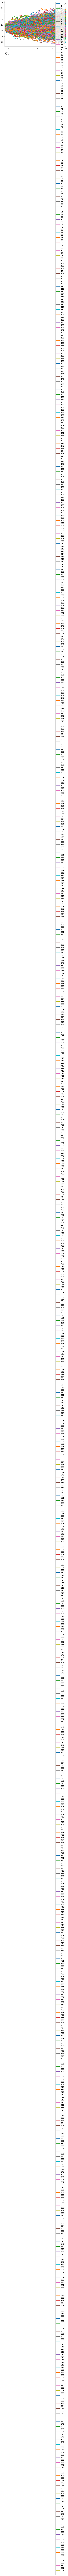

In [20]:
precios_simulados = (r_simulados + 1).cumprod()*data_aapl[-1]
precios_simulados.plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

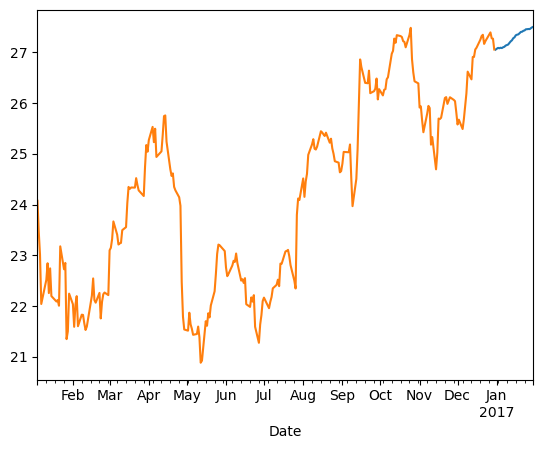

In [24]:
((r_simulados + 1).cumprod()*data_aapl[-1]).mean(axis=1).plot()
data = getClose("AAPL", "2016-01-01", "2016-12-31")
data.plot()

In [25]:
((r_simulados + 1).cumprod()).mean(axis=1)


2016-12-31    0.999871
2017-01-01    1.000550
2017-01-02    1.001177
2017-01-03    1.000886
2017-01-04    1.001269
2017-01-05    1.001020
2017-01-06    1.001617
2017-01-07    1.001964
2017-01-08    1.002848
2017-01-09    1.003234
2017-01-10    1.003609
2017-01-11    1.004788
2017-01-12    1.005908
2017-01-13    1.006697
2017-01-14    1.008193
2017-01-15    1.008823
2017-01-16    1.010325
2017-01-17    1.010763
2017-01-18    1.010996
2017-01-19    1.011825
2017-01-20    1.012774
2017-01-21    1.012941
2017-01-22    1.013601
2017-01-23    1.013901
2017-01-24    1.014704
2017-01-25    1.014778
2017-01-26    1.014926
2017-01-27    1.014842
2017-01-28    1.015548
2017-01-29    1.016187
2017-01-30    1.016580
Freq: D, dtype: float64

In [26]:
((r_simulados + 1).cumprod()*data_aapl[-1]).mean(axis=1)


2016-12-31    27.052764
2017-01-01    27.071118
2017-01-02    27.088080
2017-01-03    27.080208
2017-01-04    27.090571
2017-01-05    27.083848
2017-01-06    27.100000
2017-01-07    27.109388
2017-01-08    27.133291
2017-01-09    27.143751
2017-01-10    27.153894
2017-01-11    27.185792
2017-01-12    27.216098
2017-01-13    27.237448
2017-01-14    27.277916
2017-01-15    27.294966
2017-01-16    27.335592
2017-01-17    27.347436
2017-01-18    27.353754
2017-01-19    27.376192
2017-01-20    27.401852
2017-01-21    27.406373
2017-01-22    27.424246
2017-01-23    27.432347
2017-01-24    27.454085
2017-01-25    27.456084
2017-01-26    27.460087
2017-01-27    27.457823
2017-01-28    27.476917
2017-01-29    27.494205
2017-01-30    27.504833
Freq: D, dtype: float64

In [27]:
data

Date
2016-01-04    24.074741
2016-01-05    23.471441
2016-01-06    23.012115
2016-01-07    22.040899
2016-01-08    22.157444
                ...    
2016-12-23    27.219761
2016-12-27    27.392628
2016-12-28    27.275826
2016-12-29    27.268816
2016-12-30    27.056234
Name: Adj Close, Length: 252, dtype: float64

In [30]:
D = data[-1]
d = precios_simulados.mean(axis=1)[-1]
print("ERROR",((D/d)-1)*100,"%")

ERROR -1.6309795835322327 %


In [31]:
data.describe()


count    252.000000
mean      24.200999
std        1.876589
min       20.883030
25%       22.381529
50%       24.342087
75%       25.765303
max       27.482794
Name: Adj Close, dtype: float64

In [32]:
pd.date_range(start="2023-03-01", periods = 17)


DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16',
               '2023-03-17'],
              dtype='datetime64[ns]', freq='D')

## 3. Proyección de precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el 2018.

Con los rendimientos, calculamos los precios de cierre...

## 4. Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [37]:
valor_deseado = data_appl[-1]*1.07
probabilidad = (precios_simulados >= valor_deseado).mean(axis=1)
probabilidad


2016-12-31    0.000
2017-01-01    0.002
2017-01-02    0.005
2017-01-03    0.017
2017-01-04    0.037
2017-01-05    0.047
2017-01-06    0.059
2017-01-07    0.067
2017-01-08    0.092
2017-01-09    0.104
2017-01-10    0.118
2017-01-11    0.128
2017-01-12    0.130
2017-01-13    0.146
2017-01-14    0.146
2017-01-15    0.154
2017-01-16    0.176
2017-01-17    0.177
2017-01-18    0.191
2017-01-19    0.203
2017-01-20    0.204
2017-01-21    0.217
2017-01-22    0.227
2017-01-23    0.242
2017-01-24    0.233
2017-01-25    0.242
2017-01-26    0.247
2017-01-27    0.243
2017-01-28    0.247
2017-01-29    0.256
2017-01-30    0.261
Freq: D, dtype: float64

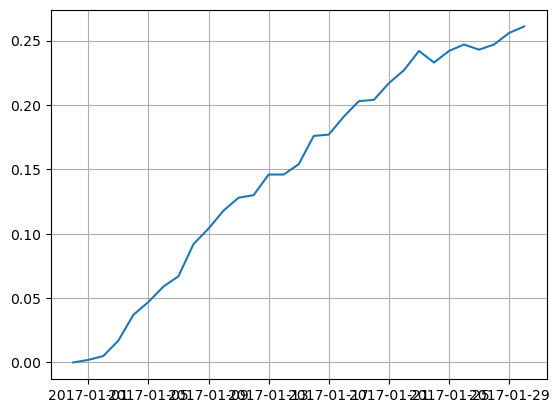

In [38]:
valor_deseado = data_appl[-1]*1.07
probabilidad = (precios_simulados >= valor_deseado).mean(axis=1)
plt.figure()
plt.plot(probabilidad)
plt.grid()

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre ajustados obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.